In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
import scipy.signal as ss
%matplotlib inline
import heartpy as hp
from scipy.fft import fft, fftfreq, ifft

{'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}
(5000, 12)


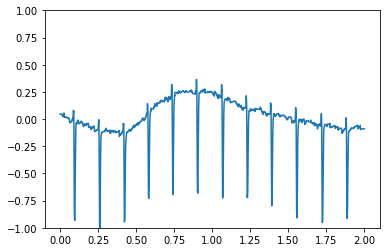

In [65]:
path = ""
sampling_rate = 500

Y = pd.read_csv("ptbxl_database.csv", index_col=0)
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

data = wfdb.rdsamp("records500/00000/00008_hr")

agg_df = pd.read_csv("scp_statements.csv", index_col=0)
# Filter out the empty ones.
agg_df = agg_df[agg_df.diagnostic == True]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

print(data[1])
data = np.array(data[0])
print(data.shape)

# Plotajmo drugi odvod
x = np.linspace(0,2,5000)
y = data[:5000, 6]

# y = ss.savgol_filter(y, window_length=199, polyorder=7)

plt.plot(x,y, "-")
plt.ylim((-1,1))
plt.show()

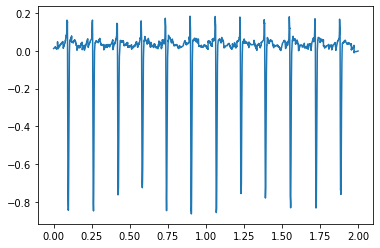

In [66]:
filtered = hp.filter_signal(y,sample_rate=500, filtertype="highpass", cutoff=1)
plt.plot(x,filtered)

In [67]:
import csv
with open("haha.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows([filtered])

In [68]:
filtered = hp.get_data("haha.csv")
# enhanced = hp.enhance_peaks(filtered)

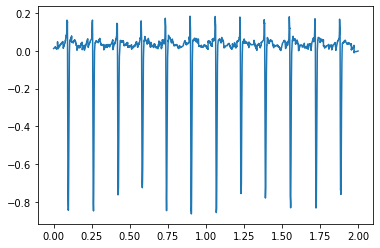

In [69]:
plt.plot(x, filtered)

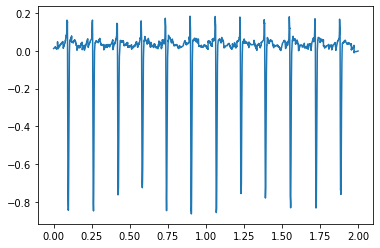

In [70]:
filt = hp.filter_signal(filtered, sample_rate=500, cutoff=35 ,filtertype="notch")
x = np.linspace(0,2,5000)
plt.plot(x,filt)

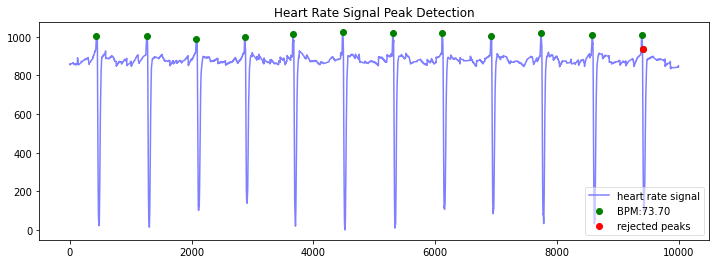

bpm: 73.701843
ibi: 814.090909
sdnn: 16.267394
sdsd: 10.428806
rmssd: 21.498837
pnn20: 0.500000
pnn50: 0.000000
hr_mad: 13.000000
sd1: 15.072491
sd2: 17.266152
s: 817.580410
sd1/sd2: 0.872950
breathingrate: 0.223339


In [56]:
from scipy.signal import resample
resampled_data = resample(filt, len(filt) * 2)

wd, m = hp.process(hp.scale_data(resampled_data), sample_rate=1000)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [57]:
# Na podlagi bpm razdelimo graf na enake segmente
# Vemo, da je vsak odvod dolg 10 s pri 100 Hz = 1000 točk
# Vzel bi kar  od začetka naslednjih x točk, ki se ujemajo intervalu in tako naprej.
m["bpm"] = 73.70
RR_int = 60 * 1000 / m["bpm"] # v milisekundah
# Ker je frekvenca 500 Hz, je ena točka na vsake 2 milisekunde.
num_points = int(round(RR_int / 2))

0 407
408 815
816 1223
1224 1631
1632 2039
2040 2447
2448 2855
2856 3263
3264 3671
3672 4079


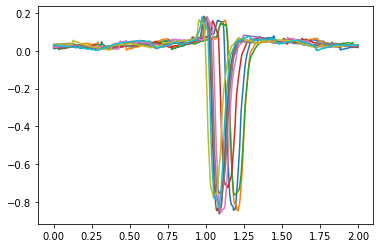

In [58]:
x = np.linspace(0,2,num_points)
num_intervals = 5000 // num_points
num_intervals
current_index = 0
new_y = np.zeros(num_points)
for i in range(10):
    start = int(current_index)
    end = int(start + round(num_points))
    current_index = end + 1
    print(start, end)
    plt.plot(x, filtered[start:end])
    new_y += filtered[start:end]
    
plt.show()
    

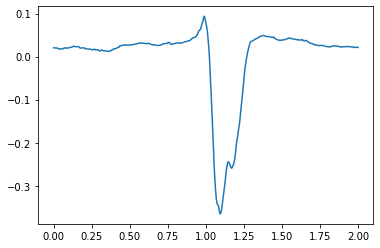

In [59]:
plt.plot(x, new_y/num_intervals)

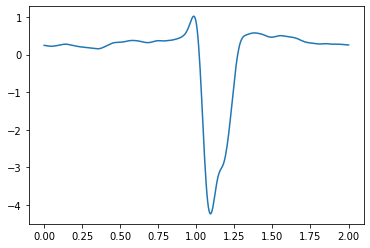

In [60]:
y = hp.filter_signal(new_y, sample_rate=500, filtertype="lowpass", cutoff=25)
plt.plot(x,y)

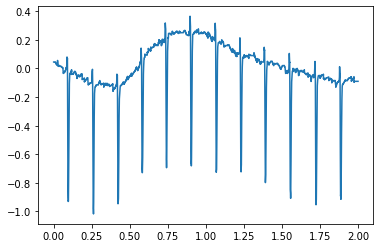

In [71]:
plt.plot(x,y)


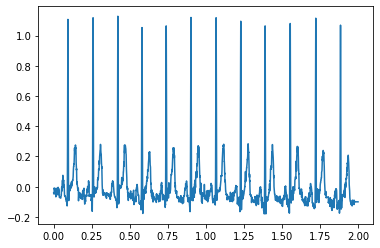

In [45]:
num_points = len(y)
plt.plot(x,y)

In [46]:
freqs = fftfreq(num_points)

In [47]:
mask = freqs > 0

In [48]:
fft_vals = fft(y)
# To get true theoretical fit
fft_theo = 2.0*np.abs(fft_vals/num_points)

(0.0, 0.1)

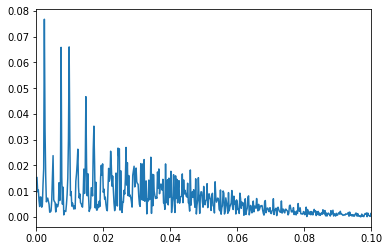

In [49]:
plt.plot(freqs[mask], fft_theo[mask])
plt.xlim(0,0.1)